In [19]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import pandas as pd
import seaborn as sns

In [20]:
df = pd.read_csv('kc_house_data.csv')

In [21]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [23]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [24]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [25]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [26]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [27]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Axes: xlabel='price', ylabel='Count'>

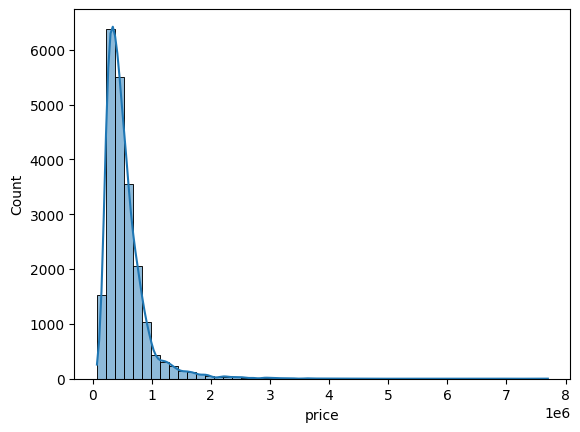

In [28]:

sns.histplot(df['price'], kde=True, bins=50)


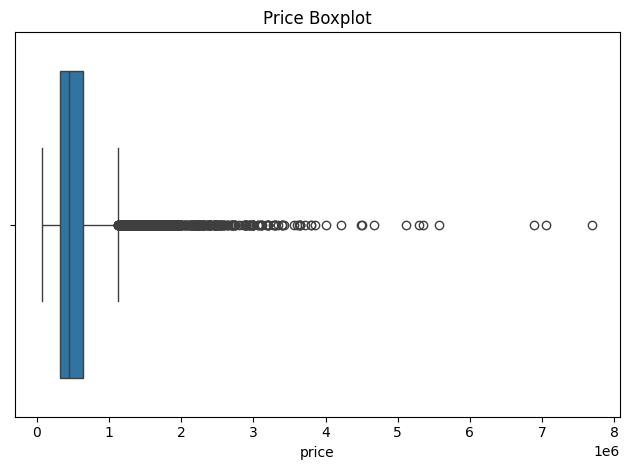

In [29]:
sns.boxplot(x=df['price'])
plt.title('Price Boxplot')
plt.tight_layout()
plt.show()

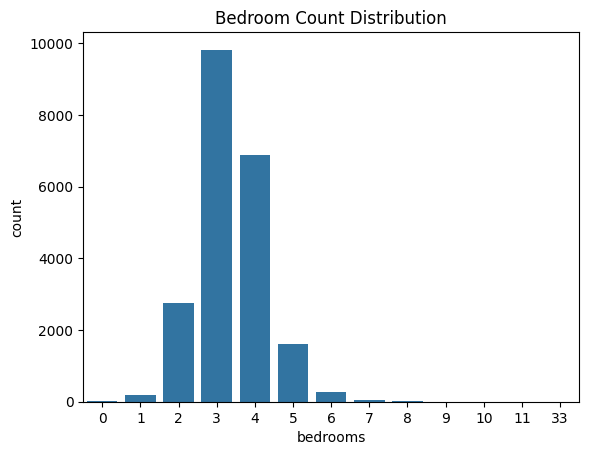

In [30]:
sns.countplot(x='bedrooms', data=df)
plt.title('Bedroom Count Distribution')
plt.show()

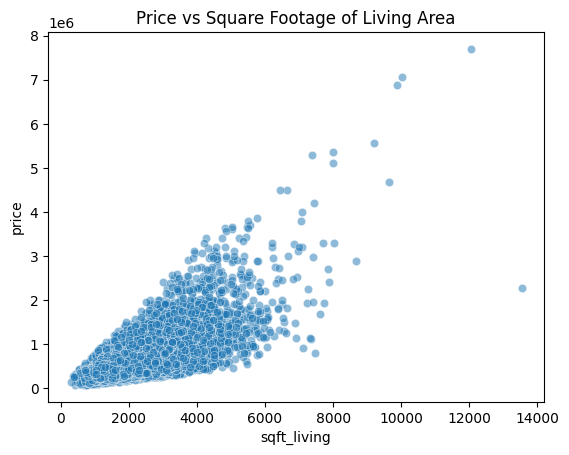

In [31]:
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.5)
plt.title('Price vs Square Footage of Living Area')
plt.show()

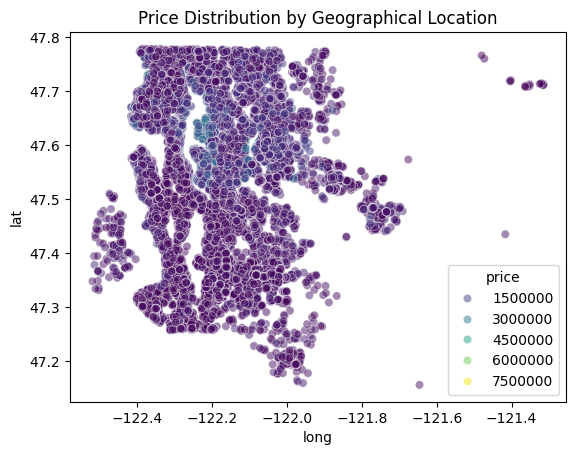

In [32]:
sns.scatterplot(x='long', y='lat', hue='price', data=df, palette='viridis', alpha=0.5)
plt.title('Price Distribution by Geographical Location')
plt.show()

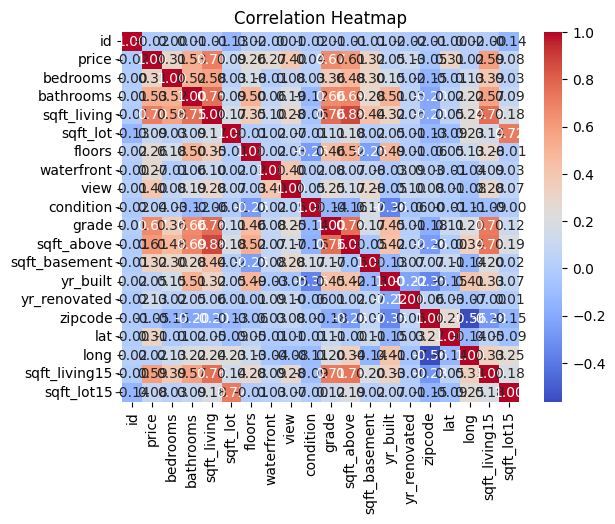

In [33]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

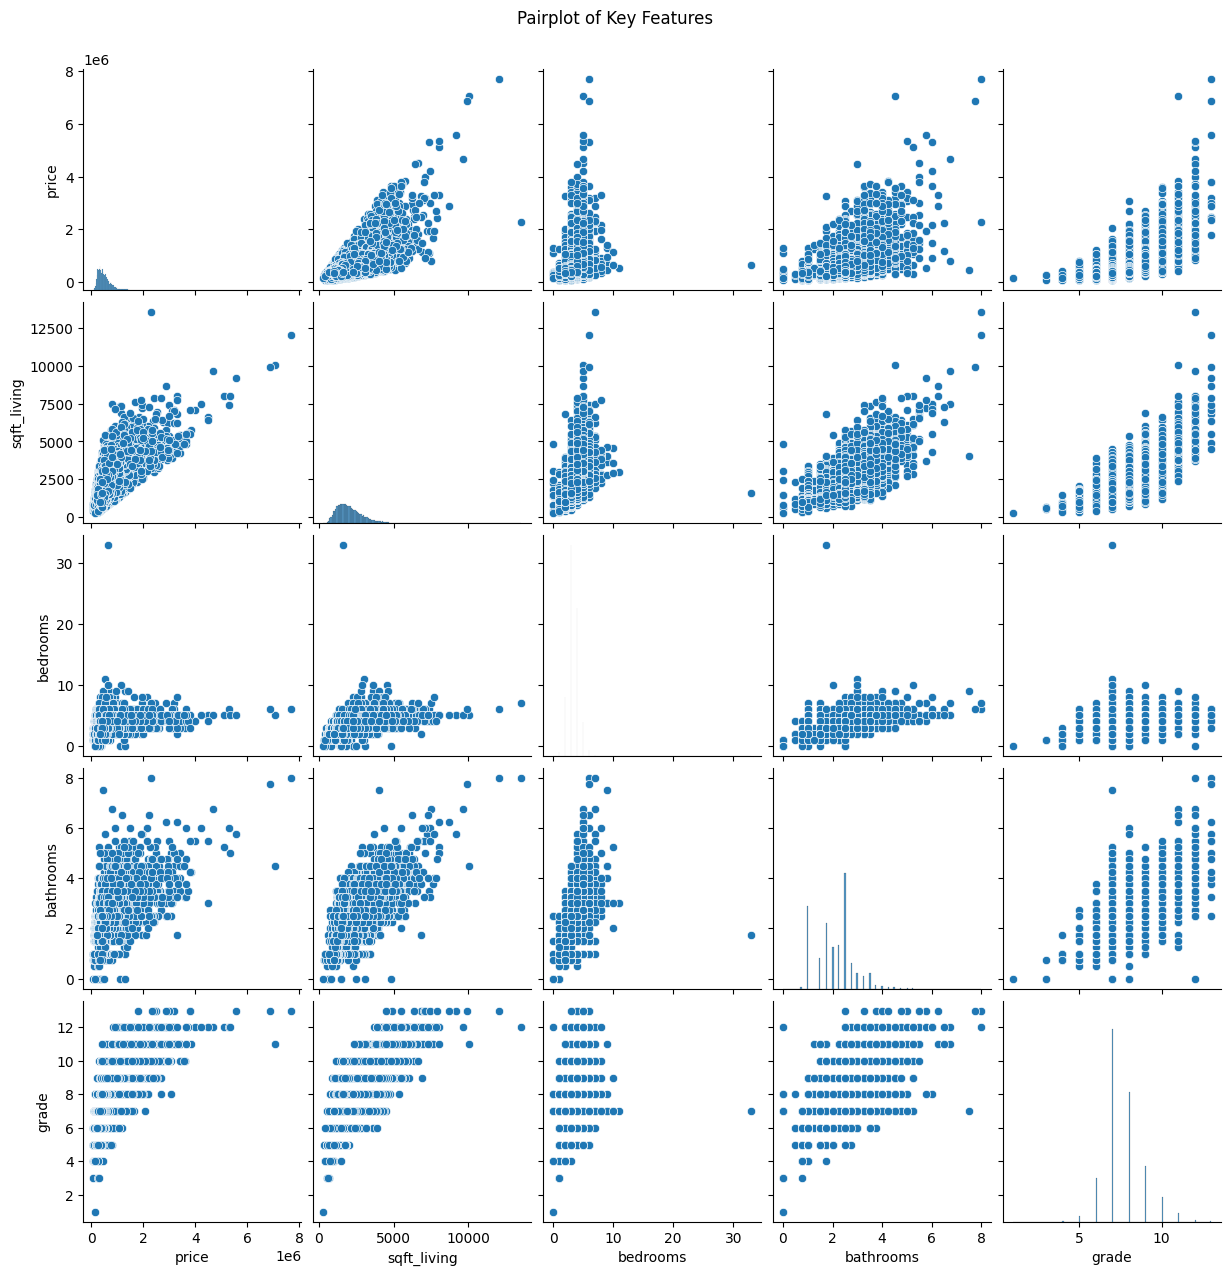

In [34]:
sns.pairplot(df[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'grade']])
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

In [35]:
# sns.lineplot(x='sale_year', y='price', data=df, estimator='median')
# plt.title('Median Price Trend Over Years')
# plt.show()


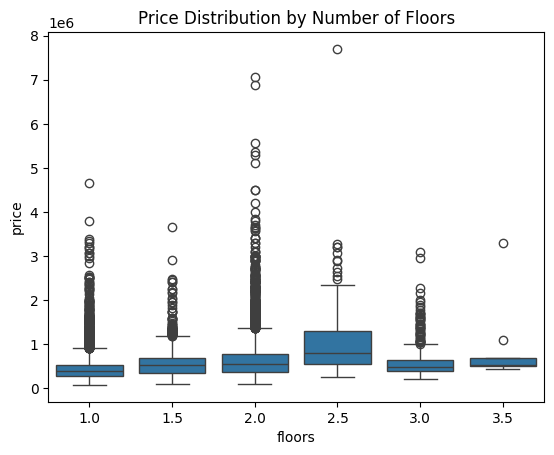

In [36]:
sns.boxplot(x='floors', y='price', data=df)
plt.title('Price Distribution by Number of Floors')
plt.show()

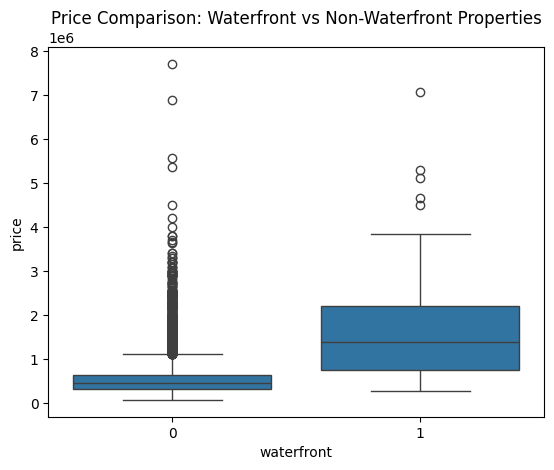

In [37]:
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price Comparison: Waterfront vs Non-Waterfront Properties')
plt.show()

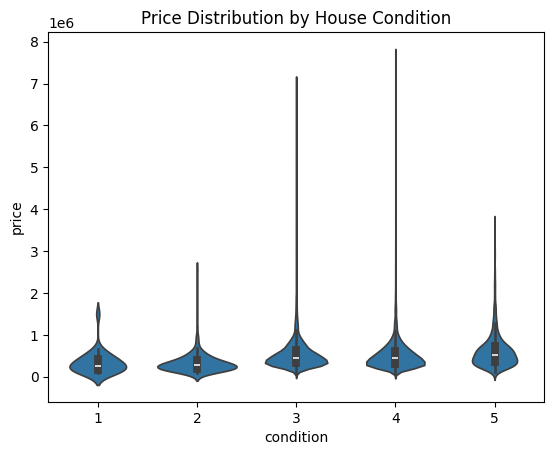

In [38]:
sns.violinplot(x='condition', y='price', data=df)
plt.title('Price Distribution by House Condition')
plt.show()

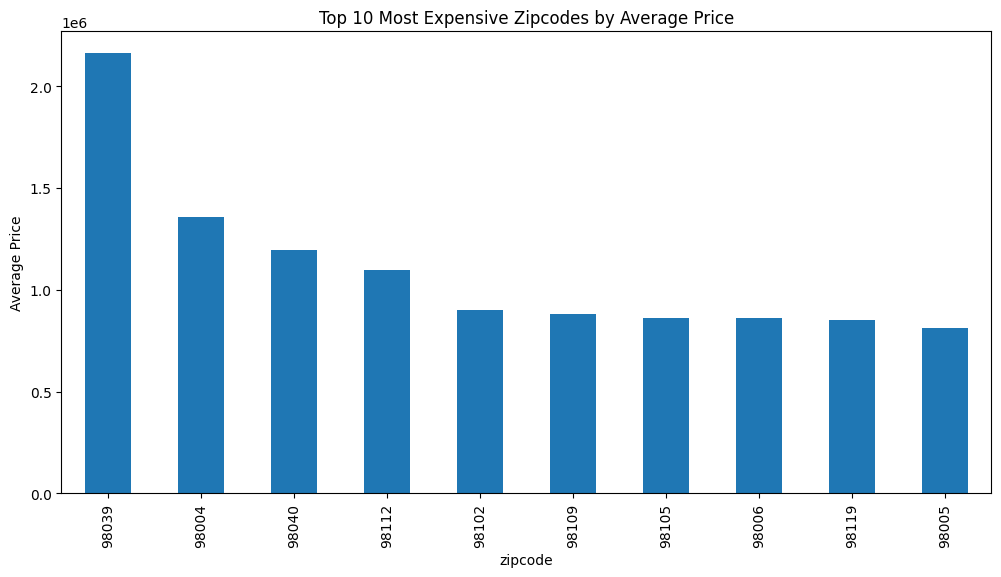

In [39]:
top_zipcodes = df.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_zipcodes.plot(kind='bar')
plt.title('Top 10 Most Expensive Zipcodes by Average Price')
plt.ylabel('Average Price')
plt.show()

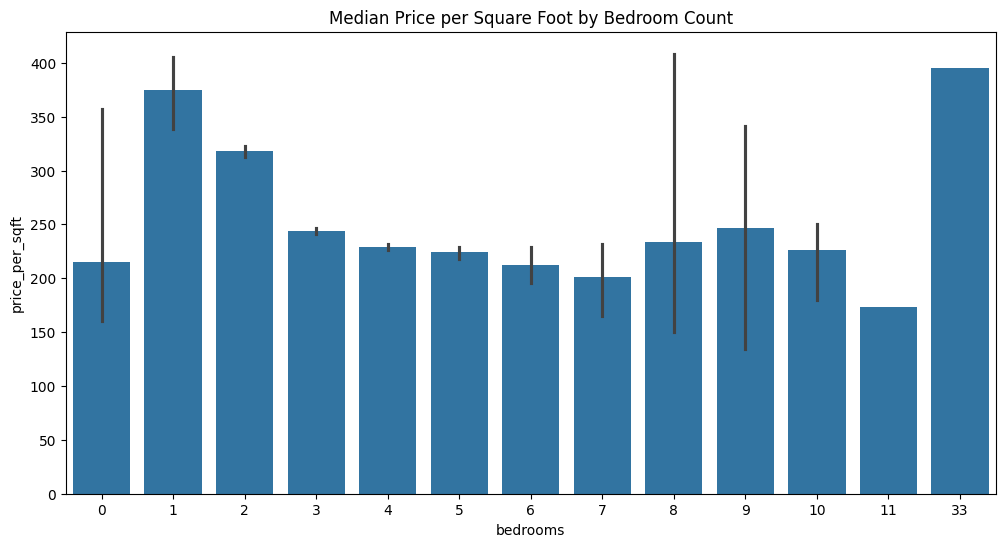

In [40]:
df['price_per_sqft'] = df['price'] / df['sqft_living']
plt.figure(figsize=(12, 6))
sns.barplot(x='bedrooms', y='price_per_sqft', data=df, estimator=np.median)
plt.title('Median Price per Square Foot by Bedroom Count')
plt.show()


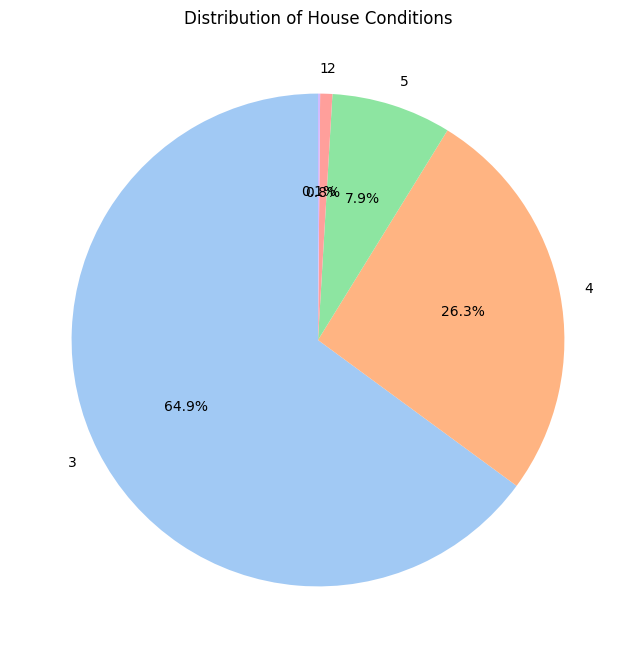

In [41]:
# Count houses by condition
condition_counts = df['condition'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(condition_counts, 
        labels=condition_counts.index, 
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel'))
plt.title('Distribution of House Conditions')
plt.show()

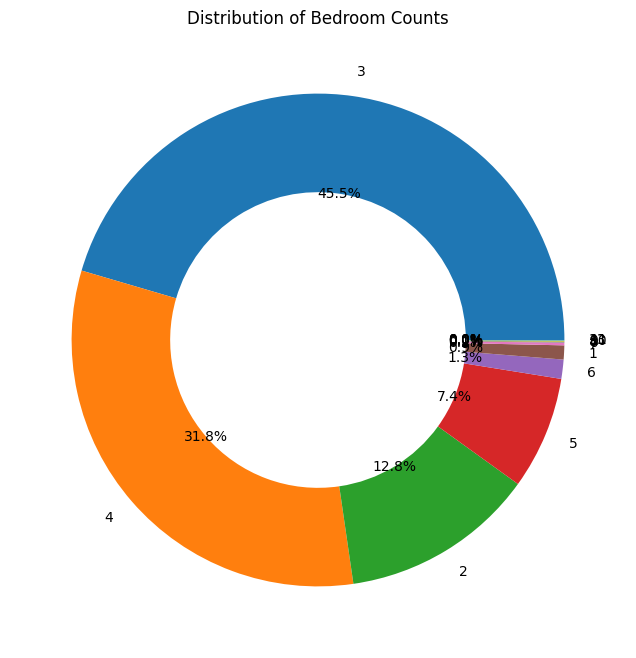

In [42]:
bedroom_counts = df['bedrooms'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(bedroom_counts, 
        labels=bedroom_counts.index, 
        autopct='%1.1f%%',
        wedgeprops={'width': 0.4})  # Creates donut effect
plt.title('Distribution of Bedroom Counts')
plt.show()

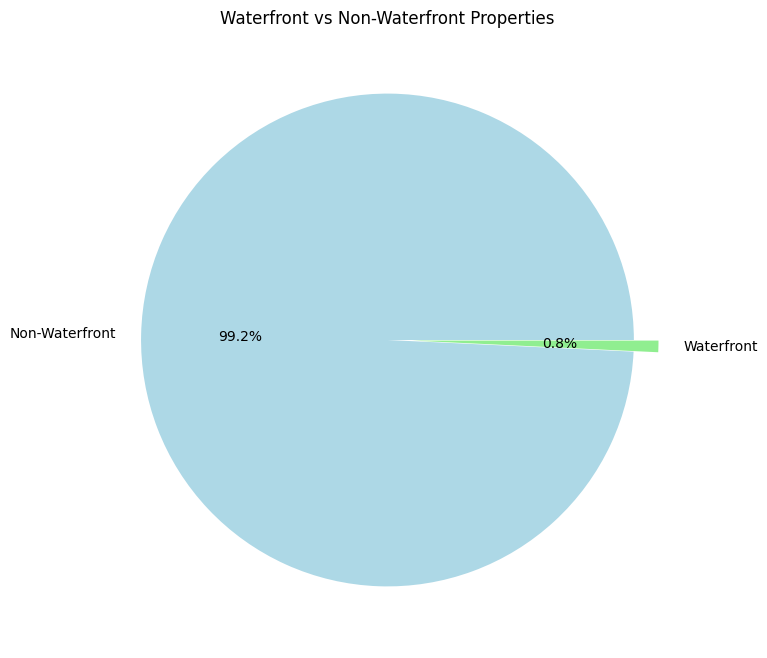

In [43]:
waterfront_counts = df['waterfront'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(waterfront_counts, 
        labels=['Non-Waterfront', 'Waterfront'],
        autopct='%1.1f%%',
        explode=(0, 0.1),  # Explode the waterfront slice
        colors=['lightblue', 'lightgreen'])
plt.title('Waterfront vs Non-Waterfront Properties')
plt.show()

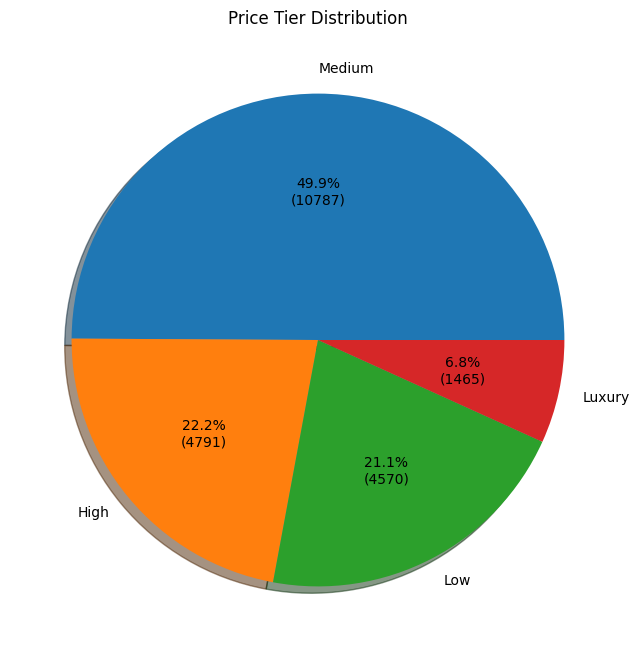

In [44]:
# Create price tiers
df['price_tier'] = pd.cut(df['price'], 
                         bins=[0, 300000, 600000, 1000000, float('inf')],
                         labels=['Low', 'Medium', 'High', 'Luxury'])

price_tier_counts = df['price_tier'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(price_tier_counts,
        labels=price_tier_counts.index,
        autopct=lambda p: f'{p:.1f}%\n({int(p*sum(price_tier_counts)/100)})',
        shadow=True)
plt.title('Price Tier Distribution')
plt.show()

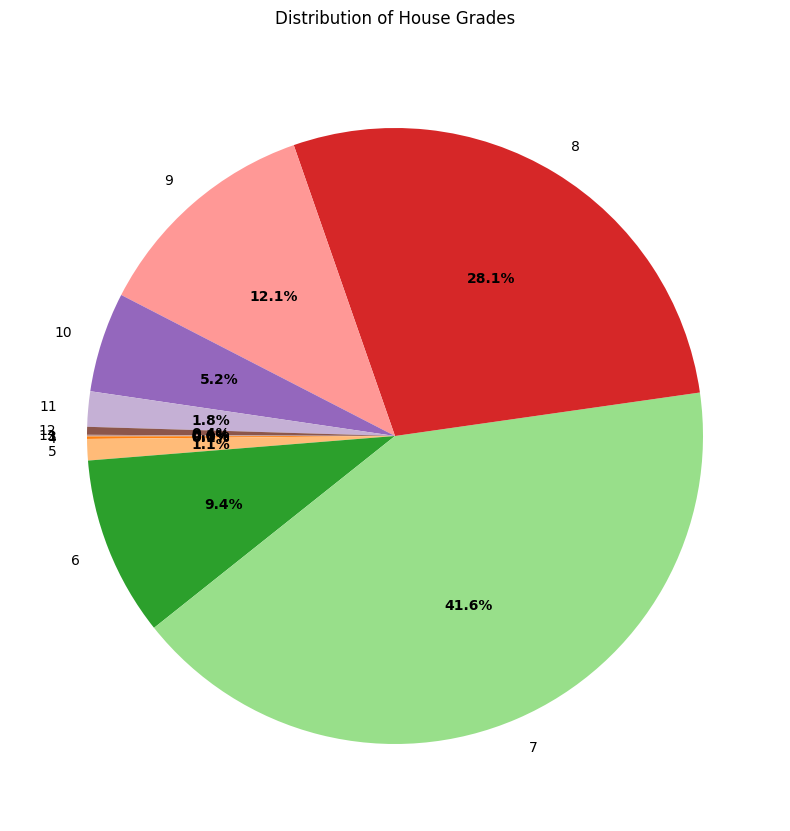

In [45]:
grade_counts = df['grade'].value_counts().sort_index()

plt.figure(figsize=(10, 10))
patches, texts, autotexts = plt.pie(grade_counts,
                                   labels=grade_counts.index,
                                   autopct='%1.1f%%',
                                   startangle=180,
                                   colors=plt.cm.tab20.colors)

# Make labels more readable
plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=10)
plt.title('Distribution of House Grades', pad=20)
plt.show()

In [51]:
df.drop(columns=['id', 'date'], inplace=True)

In [57]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,price_tier
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,188.050847,Low
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,209.338521,Medium
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,233.766234,Low
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,308.163265,High
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,303.571429,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,98103,47.6993,-122.346,1530,1509,235.294118,Medium
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,98146,47.5107,-122.362,1830,7200,173.160173,Medium
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,1020,2007,394.216667,Medium
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,98027,47.5345,-122.069,1410,1287,250.000000,Medium


In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [64]:
df['price_tier'] = le.fit_transform(df['price_tier'])
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft,price_tier
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,188.050847,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,209.338521,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,233.766234,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,308.163265,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,303.571429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,98103,47.6993,-122.346,1530,1509,235.294118,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,98146,47.5107,-122.362,1830,7200,173.160173,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,1020,2007,394.216667,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,98027,47.5345,-122.069,1410,1287,250.000000,0


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X = df.drop(columns=['price'], axis=1)
y = df['price']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
x_train.shape

(14480, 20)

In [69]:
x_train.shape

(14480, 20)

In [70]:
model = keras.Sequential()
model.add(keras.Input(shape=(20,)))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(3, activation='linear'))

In [71]:
model.compile(
    optimizer="adam",
    loss='mse',
    metrics=['mse'],
)

In [72]:
model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=100,
    verbose="auto",
    validation_data=(x_test, y_test),
)

Epoch 1/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 404550844416.0000 - mse: 404550844416.0000 - val_loss: 269872447488.0000 - val_mse: 269872447488.0000
Epoch 2/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 186623262720.0000 - mse: 186623262720.0000 - val_loss: 146771820544.0000 - val_mse: 146771820544.0000
Epoch 3/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 117624602624.0000 - mse: 117624602624.0000 - val_loss: 138827628544.0000 - val_mse: 138827628544.0000
Epoch 4/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 106450575360.0000 - mse: 106450575360.0000 - val_loss: 136329797632.0000 - val_mse: 136329797632.0000
Epoch 5/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 114176901120.0000 - mse: 114176901120.0000 - val_loss: 132471824384.0000 - val_mse: 132471824384.0000
Epoch 6/100
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 110774124544.0000 - mse: 110774124544.0000 - val_loss: 127525642240.0000 - val_mse: 127525642240.0000
Epoch 7/100
227/227 ━━

In [73]:
model.evaluate(
    x=x_test,
    y=y_test,
    batch_size=64,
    verbose="auto",
  
)

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8234546688.0000 - mse: 8234546688.0000


[8387118592.0, 8387118592.0]

In [74]:
model.predict(x_test, batch_size=64, verbose="auto", steps=None, callbacks=None)

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ 356902.44,  359839.22,  357908.5 ],
       [ 778137.3 ,  776995.56,  777830.3 ],
       [1011848.56, 1012946.  , 1012621.8 ],
       ...,
       [ 567556.5 ,  565396.3 ,  566627.06],
       [ 565542.25,  561075.4 ,  563840.44],
       [ 300352.3 ,  300491.8 ,  300497.1 ]], dtype=float32)